# IMAGE AUGMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import scipy

In [ ]:
data = open(r"C:\Users\splpt649\Downloads\IBM\Assignments\flowers")

FileNotFoundError: ignored

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_datagen.flow_from_directory('/content/gdrive/MyDrive/data/flowers',target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4317 images belonging to 5 classes.


In [ ]:
x_test=test_datagen.flow_from_directory('/content/gdrive/MyDrive/data/flowers',target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4317 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# INITIALIZING CNN AND CREATE MODEL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

# ADD LAYERS

In [ ]:
model=Sequential()

# INPUT LAYERS (CONVOLUTION ,MAXPOOLING,FLATTEN)

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


# HIDDEN LAYERS

In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

# OUTPUT LAYERS

In [ ]:
model.add(Dense(5,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
len(x_train)

180

# TRAIN THE MODEL

In [82]:
model.fit(x_train,steps_per_epoch=len(x_train), validation_data=x_test, validation_steps=len(x_test), epochs= 30)

Epoch 1/30
180/180 [==============================] - 60s 333ms/step - loss: 1.2842 - accuracy: 0.4820 - val_loss: 1.0587 - val_accuracy: 0.5874
Epoch 2/30
180/180 [==============================] - 56s 312ms/step - loss: 1.0118 - accuracy: 0.6053 - val_loss: 0.9413 - val_accuracy: 0.6359
Epoch 3/30
180/180 [==============================] - 56s 309ms/step - loss: 0.9212 - accuracy: 0.6484 - val_loss: 0.8523 - val_accuracy: 0.6799
Epoch 4/30
180/180 [==============================] - 56s 310ms/step - loss: 0.8636 - accuracy: 0.6681 - val_loss: 0.8199 - val_accuracy: 0.6970
Epoch 5/30
180/180 [==============================] - 56s 314ms/step - loss: 0.8132 - accuracy: 0.6880 - val_loss: 0.8219 - val_accuracy: 0.6833
Epoch 6/30
180/180 [==============================] - 57s 316ms/step - loss: 0.7598 - accuracy: 0.7123 - val_loss: 0.6593 - val_accuracy: 0.7508
Epoch 7/30
180/180 [==============================] - 57s 314ms/step - loss: 0.7144 - accuracy: 0.7308 - val_loss: 0.6036 - val_ac

# SAVE THE MODEL

In [83]:
model.save('Flowers_classification_model1.h5')

# TEST THE MODEL

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
# Load the model
model=load_model('Flowers_classification_model1.h5')

In [ ]:
img=image.load_img('/content/gdrive/MyDrive/data/rose.jpg',target_size=(64,64))

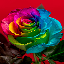

In [ ]:
img

In [ ]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
# x_train.class_indices
index=['daisy','dandelion','rose','sunflower','tulip']
index[y[0]]

1/1 [==============================] - 0s 119ms/step


'daisy'